1.)  Preliminary Data Inspection and Cleaning

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('Tesla_Deaths.csv')

In [6]:
df = df.iloc[:-12, :]

In [7]:
df = df.iloc[:-1, :]

In [8]:
df.columns = df.columns.str.strip()

In [9]:
df.loc[(df["Country"] != "USA") & (df["State"] == "-"), "State"] = "Non-US"

In [10]:
df = df.drop(columns=['Autopilot claimed'])

In [11]:

s = df["Tesla driver"].astype(str).str.strip()

# standardize common "missing" markers
s = s.replace({"-": np.nan, "nan": np.nan, "": np.nan, "None": np.nan})

# convert to numeric safely, then fill missing with 0, then int
df["Tesla driver"] = pd.to_numeric(s, errors="coerce").fillna(0).astype(int)


In [12]:
s = df["Tesla occupant"].astype(str).str.strip()

# standardize common "missing" markers
s = s.replace({"-": np.nan, "nan": np.nan, "": np.nan, "None": np.nan})

# convert to numeric safely, then fill missing with 0, then int
df["Tesla occupant"] = pd.to_numeric(s, errors="coerce").fillna(0).astype(int)

In [13]:
s = df["Cyclists/ Peds"].astype(str).str.strip()

# standardize common "missing" markers
s = s.replace({"-": np.nan, "nan": np.nan, "": np.nan, "None": np.nan})

# convert to numeric safely, then fill missing with 0, then int
df["Cyclists/ Peds"] = pd.to_numeric(s, errors="coerce").fillna(0).astype(int)

In [14]:
s = df["Other vehicle"].astype(str).str.strip()

# standardize common "missing" markers
s = s.replace({"-": np.nan, "nan": np.nan, "": np.nan, "None": np.nan})

# convert to numeric safely, then fill missing with 0, then int
df["Other vehicle"] = pd.to_numeric(s, errors="coerce").fillna(0).astype(int)

In [15]:
s = df["Verified Tesla Autopilot Deaths"].astype(str).str.strip()

# standardize common "missing" markers
s = s.replace({"-": np.nan, "nan": np.nan, "": np.nan, "None": np.nan})

# convert to numeric safely, then fill missing with 0, then int
df["Verified Tesla Autopilot Deaths"] = pd.to_numeric(s, errors="coerce").fillna(0).astype(int)

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.isnull().sum()

,0
Case #,0
Year,0
Date,0
Country,0
State,0
Description,0
Deaths,0
Tesla driver,0
Tesla occupant,0
Other vehicle,0


In [18]:
df

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,294.0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,0,0,...,0,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230118162813/ht...,NaN,NaN,NaN,NaN,NaN
1,293.0,2022.0,1/7/2023,Canada,Non-US,Tesla crashes,1.0,1,0,0,...,0,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230109041434/ht...,NaN,Taren Singh Lal,NaN,NaN,NaN
2,292.0,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,0,1,0,...,0,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230107232745/ht...,NaN,NaN,NaN,NaN,NaN
3,291.0,2022.0,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,0,0,...,0,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,NaN,NaN,NaN,NaN,NaN
4,290.0,2022.0,12/19/2022,Canada,Non-US,Tesla crashes into storefront,1.0,0,0,0,...,0,-,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,5.0,2014.0,7/14/2014,USA,CA,Tesla kills motorcyclist,1.0,0,0,1,...,0,-,https://web.archive.org/web/20220817120807/ht...,https://web.archive.org/web/20220817120807/ht...,https://web.archive.org/web/20220817120807/ht...,NaN,NaN,NaN,NaN,NaN
290,4.0,2014.0,7/4/2014,USA,CA,Thief crashes stolen Tesla,1.0,1,0,0,...,0,-,https://web.archive.org/web/20220817120839/ht...,https://web.archive.org/web/20220817120839/ht...,https://web.archive.org/web/20220817120839/ht...,NaN,Joshua Slot,NaN,NaN,NaN
291,3.0,2014.0,7/4/2014,USA,CA,Tesla rear ends stopped car,3.0,0,0,3,...,0,-,https://web.archive.org/web/20220412004559/ht...,https://web.archive.org/web/20220412004559/ht...,https://web.archive.org/web/20220412004559/ht...,NaN,NaN,NaN,NaN,NaN
292,2.0,2013.0,11/2/2013,USA,CA,Tesla kills cyclist,1.0,0,0,0,...,0,-,https://web.archive.org/web/20220817121049/ht...,https://web.archive.org/web/20220817121049/ht...,https://web.archive.org/web/20220817121049/ht...,NaN,NaN,NaN,NaN,NaN


In [19]:
df.columns

Index(['Case #', 'Year', 'Date', 'Country', 'State', 'Description', 'Deaths',
       'Tesla driver', 'Tesla occupant', 'Other vehicle', 'Cyclists/ Peds',
       'TSLA+cycl / peds', 'Model', 'Verified Tesla Autopilot Deaths',
       'Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO',
       'Unnamed: 16', 'Unnamed: 17', 'Source', 'Note', 'Deceased 1',
       'Deceased 2', 'Deceased 3', 'Deceased 4'],
      dtype='object')

2.) Exploratory Data Analysis



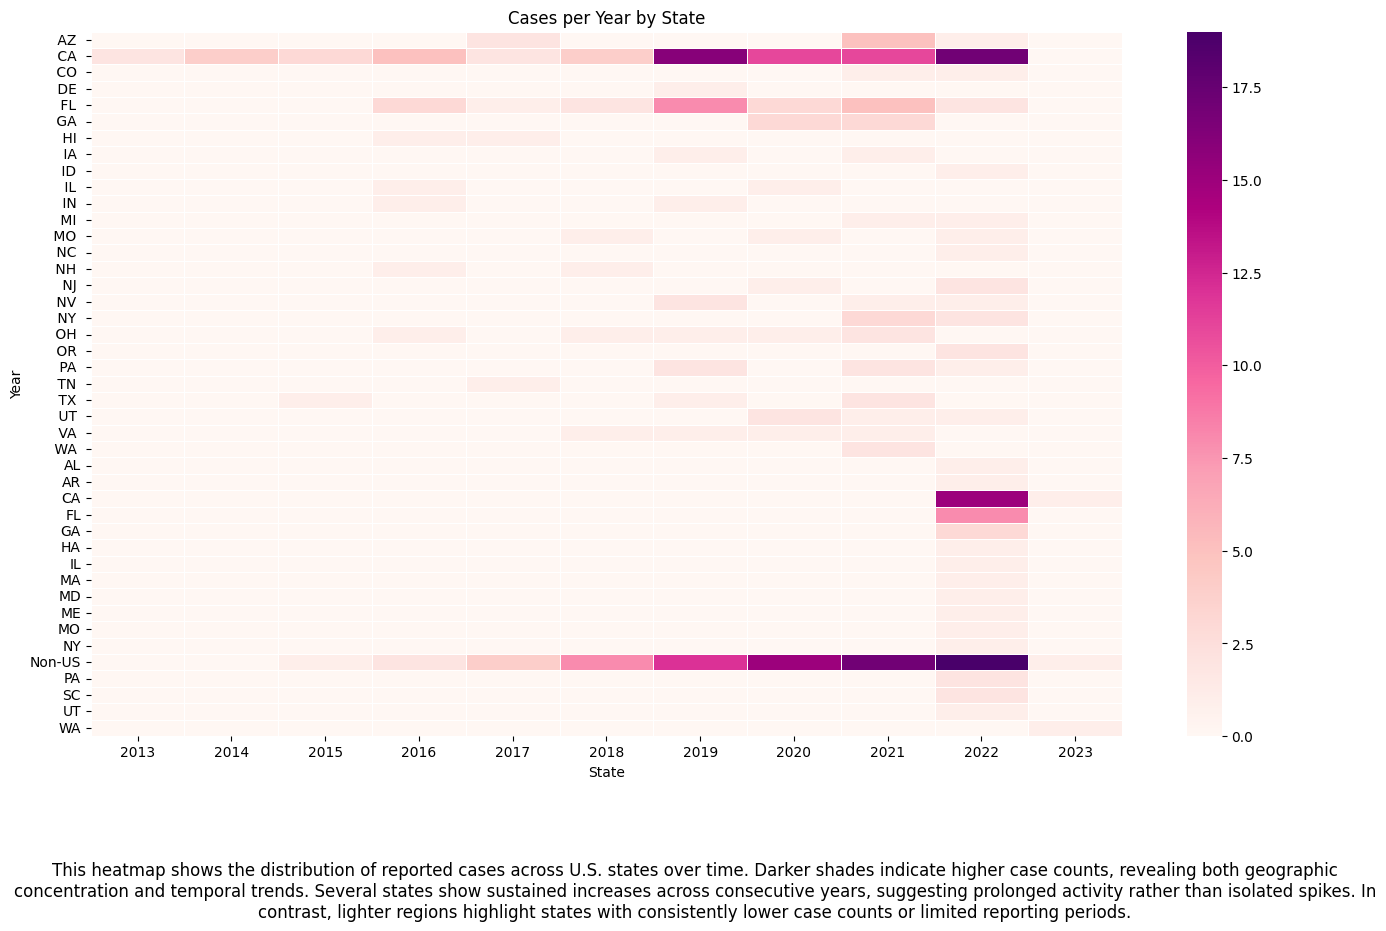

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year

cases_by_year_state = (
    df.groupby(["State", "Year"])
      .size()
      .reset_index(name="case_count")
)

pivot_table = cases_by_year_state.pivot(
    index="State",
    columns="Year",
    values="case_count"
).fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(
    pivot_table,
    cmap="RdPu",
    linewidths=0.5
)

plt.xlabel("State")
plt.ylabel("Year")
plt.title("Cases per Year by State")
plt.figtext(
    0.5, -0.15,
    "This heatmap shows the distribution of reported cases across U.S. states over time. "
    "Darker shades indicate higher case counts, revealing both geographic concentration "
    "and temporal trends. Several states show sustained increases across consecutive years, "
    "suggesting prolonged activity rather than isolated spikes. In contrast, lighter regions "
    "highlight states with consistently lower case counts or limited reporting periods.",
    ha="center",
    wrap=True,
    fontsize=12
)

plt.tight_layout()
plt.show()

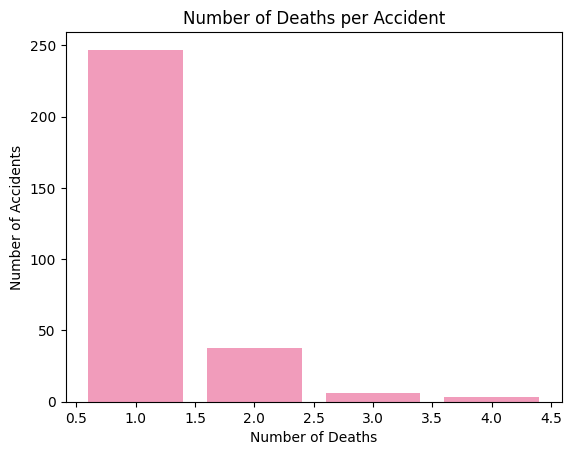

In [21]:
victims_per_case = df["Deaths"].value_counts().sort_index()
plt.bar(victims_per_case.index, victims_per_case.values, color="#F19CBB")
plt.xlabel("Number of Deaths")
plt.ylabel("Number of Accidents")
plt.title("Number of Deaths per Accident")
plt.show()

In [22]:
df["Deaths"].value_counts()

,count
Deaths,
1.0,247
2.0,38
3.0,6
4.0,3


In [23]:
df.columns

Index(['Case #', 'Year', 'Date', 'Country', 'State', 'Description', 'Deaths',
       'Tesla driver', 'Tesla occupant', 'Other vehicle', 'Cyclists/ Peds',
       'TSLA+cycl / peds', 'Model', 'Verified Tesla Autopilot Deaths',
       'Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO',
       'Unnamed: 16', 'Unnamed: 17', 'Source', 'Note', 'Deceased 1',
       'Deceased 2', 'Deceased 3', 'Deceased 4'],
      dtype='object')

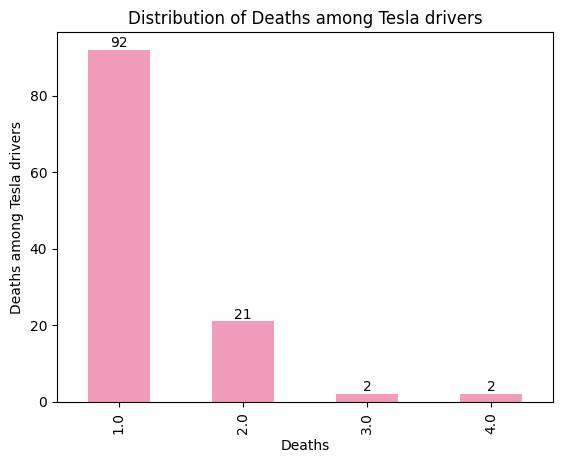

In [34]:
import matplotlib.pyplot as plt

tesla_deaths = df[df["Tesla driver"] == 1].groupby("Deaths").size()

plt.figure()
ax = tesla_deaths.plot(kind="bar", color="#F19CBB")
ax.set_xlabel("Deaths")
ax.set_ylabel("Deaths among Tesla drivers")
ax.set_title("Distribution of Deaths among Tesla drivers")

for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.01,
        f"{height:.0f}",
        ha="center",
        va="bottom"
    )
plt.show()

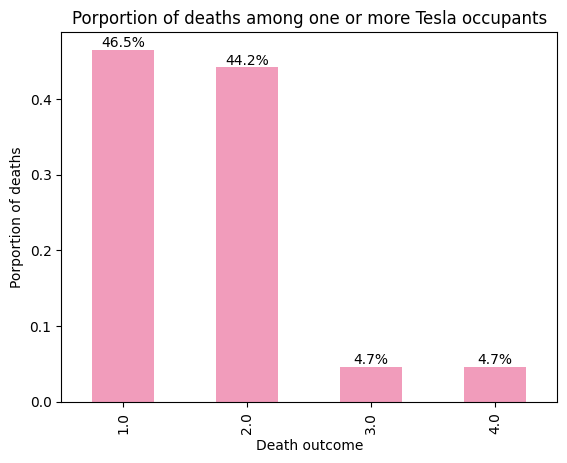

In [35]:
occupants = df[df["Tesla occupant"] >=1]

death_porp = occupants.groupby("Deaths").size() / len(occupants)

ax = death_porp.plot(kind="bar", color="#F19CBB")

ax.set_xlabel("Death outcome")
ax.set_ylabel("Porportion of deaths")
ax.set_title("Porportion of deaths among one or more Tesla occupants")

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        f"{height*100:.1f}%",
        (bar.get_x() + bar.get_width() / 2, height),
        ha="center",
        va="bottom"
    )

plt.show()

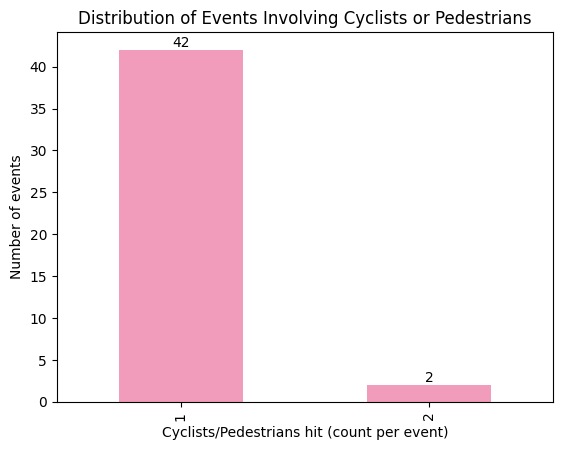

In [37]:

distribution_hit_only = df.loc[df["Cyclists/ Peds"] > 0, "Cyclists/ Peds"].value_counts().sort_index()

ax = distribution_hit_only.plot(kind="bar", color="#F19CBB")
ax.set_xlabel("Cyclists/Pedestrians hit (count per event)")
ax.set_ylabel("Number of events")
ax.set_title("Distribution of Events Involving Cyclists or Pedestrians")

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        f"{height:.0f}",
        (bar.get_x() + bar.get_width() / 2, height),
        ha="center",
        va="bottom"
    )

plt.show()


In [27]:
tesla_involved = (
    (df["Tesla driver"] == 1) |
    (df["Tesla occupant"] >= 1) &
    (df["Cyclists/ Peds"] > 0)
)

total_deaths = df.loc[tesla_involved, "Deaths"].sum()

print(f"Total deaths due to Tesla accidents: {total_deaths}")


Total deaths due to Tesla accidents: 150.0


In [28]:
other_vehicles = df["Other vehicle"].value_counts().sort_index()

print(f"Frequency of Tesla colliding with other vehicles: \n \n{other_vehicles}")

Frequency of Tesla colliding with other vehicles: 
 
Other vehicle
0    184
1     95
2     11
3      3
4      1
Name: count, dtype: int64


In [29]:
other_vehicles = df["Verified Tesla Autopilot Deaths"].value_counts().sort_index()

print(f"Distribution of Verified Tesla Autopilot deaths: \n \n{other_vehicles}")

Distribution of Verified Tesla Autopilot deaths: 
 
Verified Tesla Autopilot Deaths
0    278
1     13
2      3
Name: count, dtype: int64
